<a href="https://colab.research.google.com/github/costadomar/Modelagem_supervisonada-Classificacao-/blob/main/modelos_classificao_Case_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
# Instalação das bibliotecas necessárias para a resolução do case

!pip install -U scikit-learn==0.23.2
!pip install pandas-profiling==2.7.1 
# !pip install feature-engine==1.0.2
!pip install scikit-optimize
!pip install -U feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.
feature-engine 1.4.0 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


SUMÁRIO DAS VARIÁVEIS

customerID:Customer ID

gender:# Whether the customer is a male or a female

SeniorCitizen:# Whether the customer is a senior citizen or not (1, 0)

Partner: Whether the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

tenure: Number of months the customer has stayed with the company

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No
)
OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies:Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

PaymentMethod:The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

Churn:Whether the customer churned or not (Yes or No)

#0.CARREGANDO AS BIBLIOTECAS

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')


In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. CARREGANDO A BASE DE DADOS

In [124]:
# Importar base
df_raw = pd.read_csv("/content/drive/MyDrive/[Aluno] Dataset de aula /[Aluno] Telco-Customer-Churn.csv")

In [125]:
df = df_raw.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#2.ANÁLISE DESCRITIVA DOS DADOS

In [126]:
df.shape

(7043, 21)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [128]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


A média da variavel MonthyCharges é de 64.76 que é o valor cobrado do cliente por mês.

In [129]:
df.isnull().sum().sum() ## não possui dados nulos

0

**Insights:**

Coluna CustomerID pode ser deletada da base porque não agrega informação para modelagem

Colunas numéricas: Tenure, MonthlyCharges e TotalCharges
Coluna TotalCharges possue valores em branco

Colunas binárias: gender, SeniorCitizen, Partner, Dependents, OnlineSecurity, 
                  OnlineBackup,	DeviceProtection, TechSupport,	StreamingTV, 
                  StreamingMovies e Churn.

Coluna binária SeniorCitizen possue 0 e 1, diferente das demais colunas binárias  que são preenchidas com Yes ou No

Coluna binária gender possue Female e Male, diferente das demais colunas binárias que são preenchidas com Yes ou No

Colunas categóricas (em formato de string): MultipleLines, InternetService, Contract, PaymentMethod

Em geral o dataset não possui muitos valores nulos

Variável target: Churn - não balanceada 

#3. Feature Engineering

In [130]:
# Transformando colunas numéricas em float

df["tenure"] = df["tenure"].astype(float)
df["MonthlyCharges"] = df["MonthlyCharges"].astype(float)
df['TotalCharges'].replace(to_replace=' ', value=np.nan, inplace=True)
df.dropna(inplace=True)
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [131]:
#Excluindo variáveis não úteis
df = df.drop(columns=["customerID"])

#4. VISUALIZAÇÃO DOS DADOS

In [132]:
#separação das variaveis categoricas e numericas para a visualização
num = list(df.select_dtypes(include='number').columns)
cate = list(df.select_dtypes(include='object').columns)

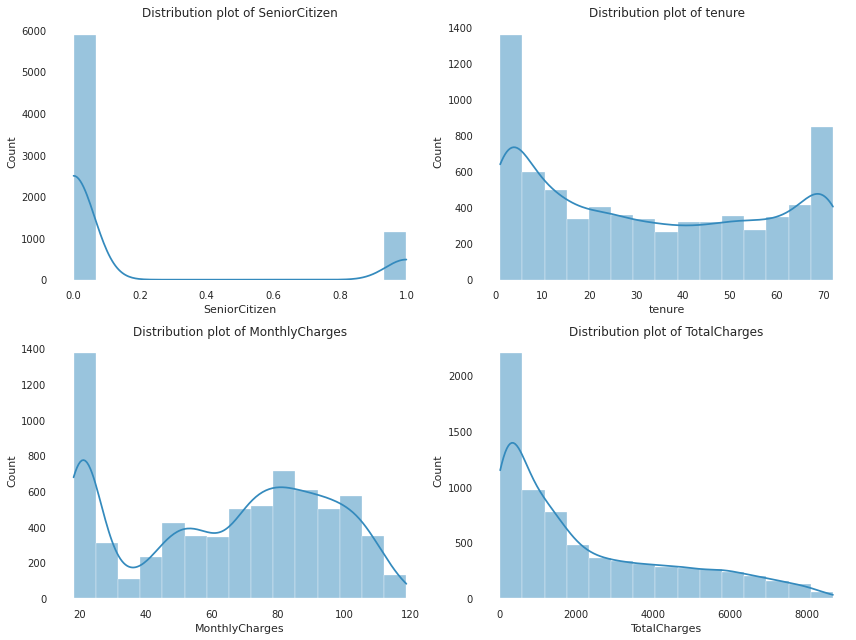

In [133]:
#plotando as variaveis numericas
plt.figure(figsize=(12,9))
for i in range(len(num)):
  plt.subplot(2,2,i+1)
  sns.histplot(x=num[i], bins=15,data=df, kde= True,palette = "Accent")
  plt.title('Distribution plot of {}'.format(num[i]))
  plt.tight_layout()

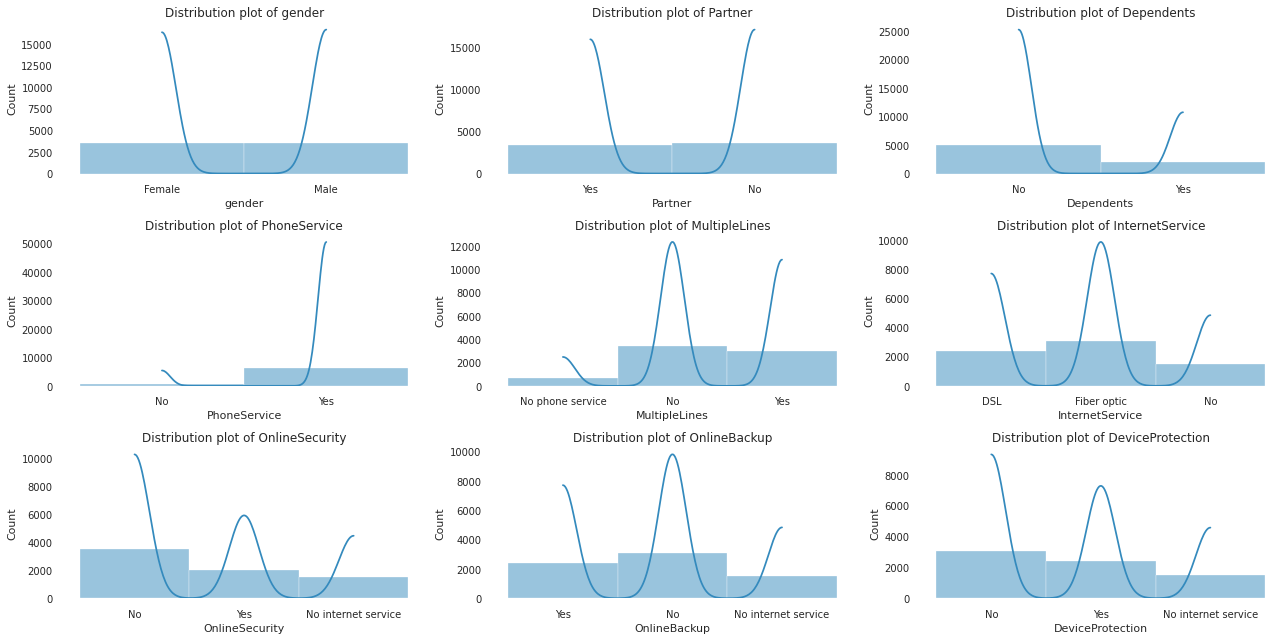

In [134]:
#plotando as variaveis categoricas
plt.figure(figsize=(18,9))
for i in range(len(cate[:9])):
  plt.subplot(3,3,i+1)
  sns.histplot(x=cate[i], bins=15,data=df, kde= True)
  plt.title('Distribution plot of {}'.format(cate[i]))
  plt.tight_layout()

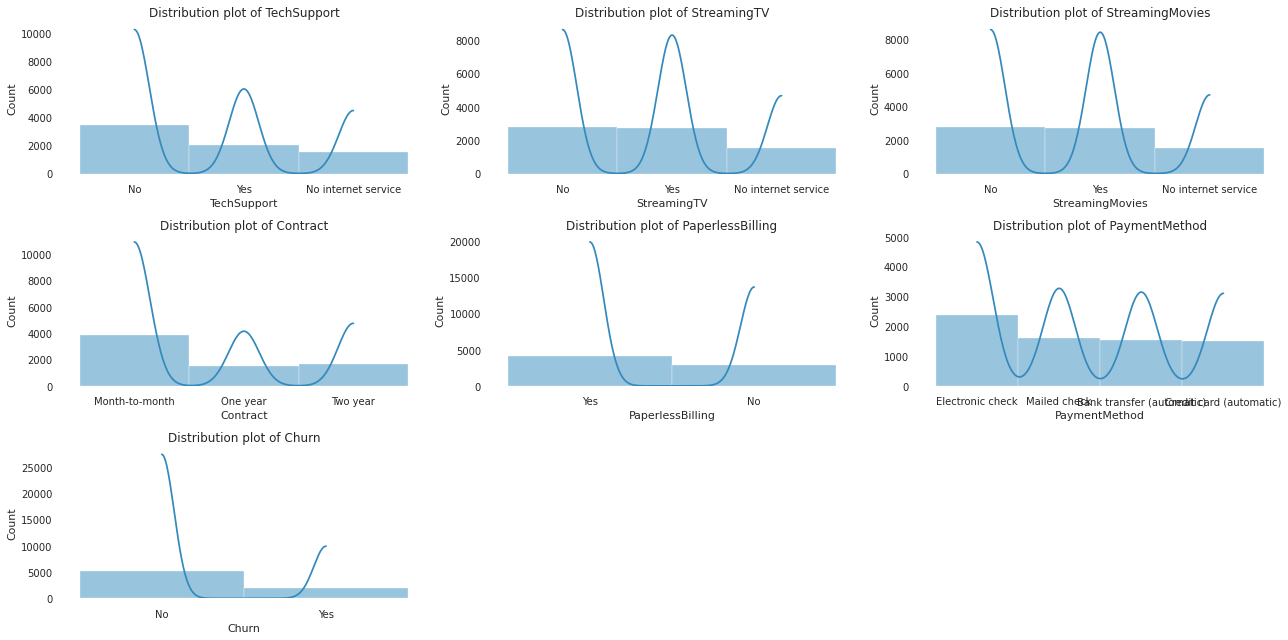

In [135]:
#plotando as variaveis categóricas
plt.figure(figsize=(18,9))
for i in range(len(cate[9:])):
  plt.subplot(3,3,i+1)
  sns.histplot(x=cate[9:][i], bins=15,data=df, kde= True)
  plt.title('Distribution plot of {}'.format(cate[9:][i]))
  plt.tight_layout()

Text(0, 0.5, 'Quantidade')

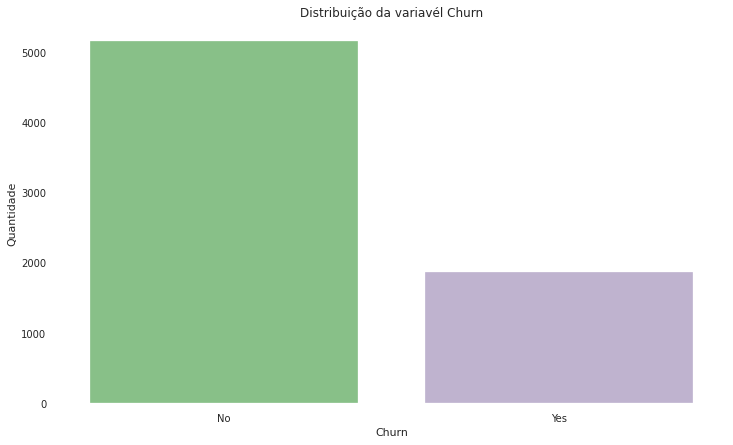

In [136]:
plt.figure(figsize=(12,7))
sns.countplot(df['Churn'],palette = "Accent")
plt.title("Distribuição da variavél Churn")
plt.ylabel('Quantidade')

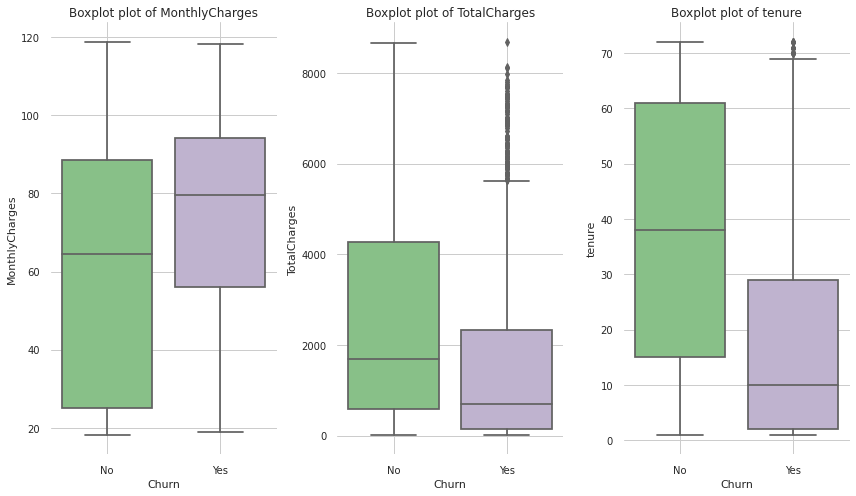

In [137]:
lista = ["MonthlyCharges","TotalCharges","tenure"]
plt.figure(figsize=(12,7))
for i in range(len(lista)):
  plt.subplot(1,3,i+1)
  sns.boxplot(x=df["Churn"],y=df[lista[i]], palette = "Accent")
  plt.title('Boxplot plot of {}'.format(lista[i]))
  plt.grid(True)
  plt.tight_layout()


Aqui temos insights interessantes sobre a base de dados:

*Os clientes que mais sofreran com churn foram os que tinham os valores cobrados por mês mais altos.

*Quanto menor o tempo de permanencia do cliente na empresa ele esta mais propenso a ter churn.

Text(0, 0.5, 'Quantidade')

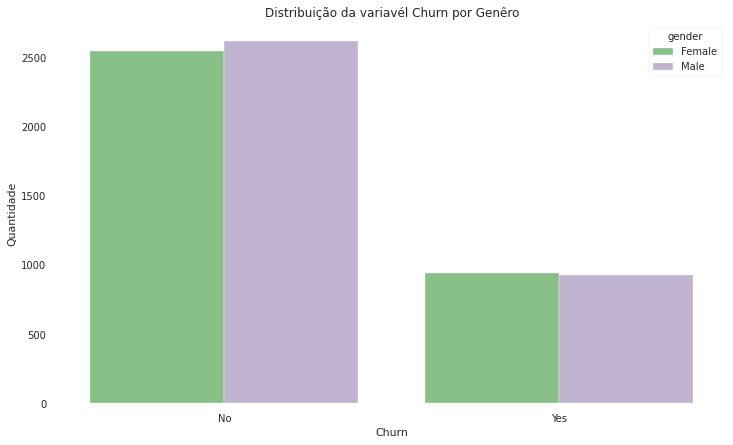

In [138]:
plt.figure(figsize=(12,7))
sns.countplot(df['Churn'],palette = "Accent", hue=df['gender'])
plt.title('Distribuição da variavél Churn por Genêro')
plt.ylabel('Quantidade')

O genero não mostrou uma relação significativa com a variavel Churn

In [139]:
#Transformando variáveis binárias

cols = ["Churn","Partner","Dependents","PhoneService", "Contract",	"PaperlessBilling"]
df[cols] = df[cols].replace({"Yes": 1, "No": 0})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1.0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34.0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2.0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45.0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2.0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [140]:
# Pelo fato da base ser desbalanceada, não iremos usar toda a classe 0.
# Iremos pegar uma amostra e juntar com o registros da classe 1 para podermos modelar de forma mais justa.

df_classe_1 = df[df["Churn"] == 1]
df_classe_0 = df[df["Churn"] == 0].sample(n=3000)
df = df_classe_1.append(df_classe_0)

#5. Train Test Split

In [141]:
#Separando preditores e target 

X = df.drop(columns=["Churn"])
Y = df[["Churn"]]

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=10)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (4138, 19)
y_train (4138, 1)
X_test (731, 19)
y_test (731, 1)


In [143]:
#from feature_engine.encoding import OneHotEncoder
to_encode = ["PaymentMethod", "Contract", "InternetService","OnlineBackup",	"OnlineSecurity", "StreamingMovies", "DeviceProtection",	"TechSupport",	"StreamingTV", "MultipleLines", "gender"]

# Configuração do encoder
encoder =OneHotEncoder(variables=to_encode, drop_last=False)

# fit tdo encoder
encoder.fit(X_train)

# transformando os dados
X_train= encoder.transform(X_train)
X_test= encoder.transform(X_test)



In [144]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Mailed check,...,TechSupport_No,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_No,StreamingTV_Yes,MultipleLines_Yes,MultipleLines_No,MultipleLines_No phone service,gender_Male,gender_Female
5830,0,0,1,30.0,1,0,25.35,723.30,1,0,...,0,0,1,0,0,1,0,0,1,0
6542,0,0,0,15.0,1,1,76.00,1130.85,0,1,...,1,0,0,1,0,1,0,0,1,0
4420,0,0,0,27.0,1,0,69.35,1927.30,0,0,...,0,1,0,0,1,0,1,0,1,0
5080,0,1,0,67.0,1,1,93.15,6368.20,0,0,...,1,0,0,1,0,1,0,0,1,0
2641,1,0,0,5.0,1,0,59.90,287.85,0,0,...,0,1,0,1,0,0,1,0,0,1


#6. NORMALIZANDO AS VARIÁVEIS

In [145]:
# Normalização das variáveis

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transformand para dataframe para visualização
X_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled,columns = X_test.columns)




In [146]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Mailed check,...,TechSupport_No,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_No,StreamingTV_Yes,MultipleLines_Yes,MultipleLines_No,MultipleLines_No phone service,gender_Male,gender_Female
0,0.0,0.0,1.0,0.408451,1.0,0.0,0.069327,0.081428,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.197183,1.0,1.0,0.574564,0.128536,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.366197,1.0,0.0,0.508229,0.220598,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.929577,1.0,1.0,0.745636,0.733923,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.056338,1.0,0.0,0.413965,0.031094,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


#7.MODELOS DE CLASSIFICAÇÃO

##7.1 Logistic Regression

In [147]:
params_grid = {
          "C":(0.01, 1, 10, 100), 
          "penalty":("l1","l2")
}


In [148]:

# Create a based model
clf = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf, param_grid=params_grid, n_jobs=-1, cv=3, verbose=0)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': (0.01, 1, 10, 100), 'penalty': ('l1', 'l2')})

In [149]:
print(grid_search.best_params_)
best_rf = grid_search.best_estimator_

{'C': 1, 'penalty': 'l2'}


In [150]:
y_pred = best_rf.predict(X_test)


f1 = round(f1_score(y_test, y_pred, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)


print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

metricas = {}
metricas["LogisticRegression"]={
                            "accuracy":accuracy,
                            "precision":precision,
                            "recall":recall,
                            "f1":f1
                            }


F1 Score: 76.46%
Accuracy Score: 77.7%
Precision Score: 72.2%
Recall Score: 69.93%


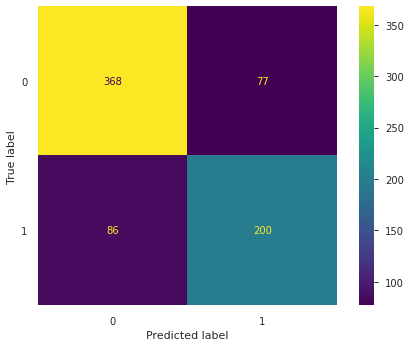

In [151]:
plot_confusion_matrix(best_rf, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

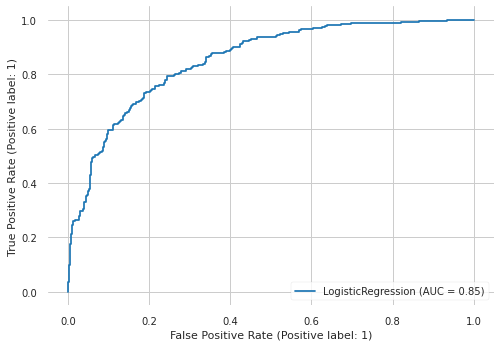

In [152]:
# Curva ROC
plot_roc_curve(best_rf, X_test, y_test)  
plt.grid()
plt.show()

##7.2 Random Forest

In [153]:
params_grid = {
    'max_depth': [100, 150],
    'max_features': [3, 4, 5],
    'criterion':['gini', 'entropy'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2, 3, 8, 10],
    'n_estimators': [200,300,400]
}

In [154]:
# Create a based model
clf = RandomForestClassifier()

# Instantiate the grid search model
bayes_search = BayesSearchCV(estimator=clf, search_spaces=params_grid, n_jobs=-1, cv=3, verbose=0)

# # Fit the grid search to the data
bayes_search.fit(X_train, y_train)


BayesSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': [100, 150], 'max_features': [3, 4, 5],
                             'min_samples_leaf': [1, 2, 3],
                             'min_samples_split': [2, 3, 8, 10],
                             'n_estimators': [200, 300, 400]})

In [155]:
print(bayes_search.best_params_)
best_rf = bayes_search.best_estimator_

OrderedDict([('criterion', 'entropy'), ('max_depth', 100), ('max_features', 3), ('min_samples_leaf', 2), ('min_samples_split', 10), ('n_estimators', 200)])


In [156]:
y_pred = best_rf.predict(X_test)

f1 = round(f1_score(y_test, y_pred, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)


print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

metricas["RandomForest"]={
                            "accuracy":accuracy,
                            "precision":precision,
                            "recall":recall,
                            "f1":f1
}




F1 Score: 76.59%
Accuracy Score: 77.98%
Precision Score: 73.41%
Recall Score: 68.53%


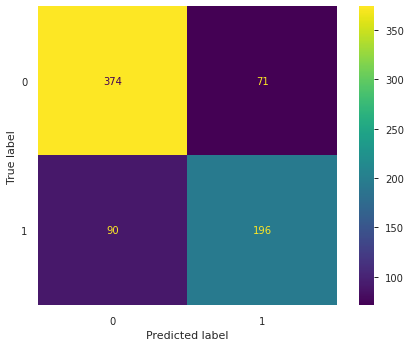

In [157]:
# Matriz de confusão

plot_confusion_matrix(best_rf, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

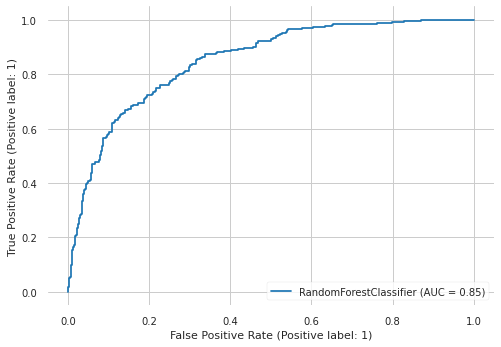

In [158]:
# Curva ROC
plot_roc_curve(best_rf, X_test, y_test)  
plt.grid()
plt.show()

##7.3 SVM

In [159]:
params_grid = {
              'kernel': ['linear','poly','rbf'], 
}


In [160]:
clf = SVC()

# Instantiate the grid search model
bayes_search = BayesSearchCV(estimator=clf, search_spaces=params_grid, n_jobs=-1,  verbose=0)

# Fit the grid search to the data
bayes_search.fit(X_train, y_train)
#clf.fit(X_train, y_train)

BayesSearchCV(estimator=SVC(), n_jobs=-1,
              search_spaces={'kernel': ['linear', 'poly', 'rbf']})

In [161]:
print(bayes_search.best_params_)
best_svm = bayes_search.best_estimator_

OrderedDict([('kernel', 'rbf')])


In [162]:
y_pred = best_svm.predict(X_test)

f1 = round(f1_score(y_test, y_pred, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)


print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

metricas["SVM"]={
                "accuracy":accuracy,
                "precision":precision,
                "recall":recall,
                "f1":f1
}



F1 Score: 74.7%
Accuracy Score: 75.92%
Precision Score: 69.37%
Recall Score: 68.88%


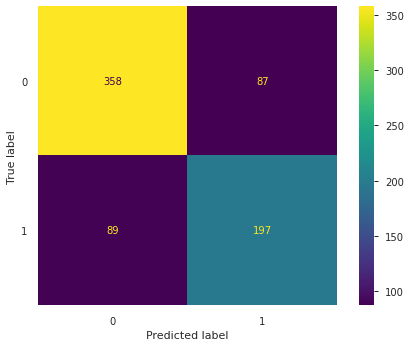

In [163]:
#Matriz de confusão

plot_confusion_matrix(best_svm, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

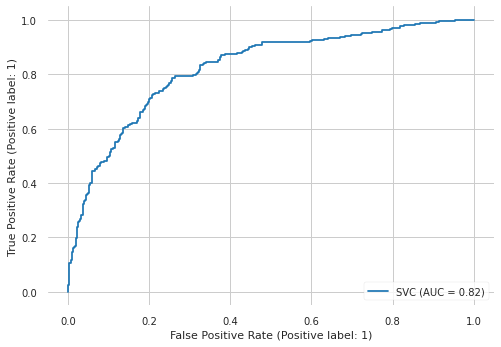

In [164]:
#Curva ROC

plot_roc_curve(best_svm, X_test, y_test)  
plt.grid()
plt.show()

#8. RESUMO DOS CLASSIFICADORES

In [165]:
resumo = pd.DataFrame.from_dict(metricas, orient='index')

In [166]:
resumo

,accuracy,precision,recall,f1
LogisticRegression,77.70,72.20,69.93,76.46
RandomForest,77.98,73.41,68.53,76.59
SVM,75.92,69.37,68.88,74.70


O Randon Forest apresentou as melhores métricas para a resolução do problema